In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# LOADING THE DATASET and PRE-PROCESSING

In [5]:
dataset = pd.read_csv(r"C:\Users\PRIYANSHI\Desktop\MediAlert\Healthcare Providers.csv")

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-null  object 
 8   Stree

In [7]:
dataset.head(5)

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


In [8]:
dataset.describe()

,index,National Provider Identifier,Zip Code of the Provider
count,1.000000e+05,1.000000e+05,1.000000e+05
mean,4.907646e+06,1.498227e+09,4.163820e+08
std,2.839633e+06,2.874125e+08,3.082566e+08
min,2.090000e+02,1.003001e+09,6.010000e+02
25%,2.458791e+06,1.245669e+09,1.426300e+08
50%,4.901266e+06,1.497847e+09,3.633025e+08
75%,7.349450e+06,1.740374e+09,6.819881e+08
max,9.847440e+06,1.993000e+09,9.990166e+08


In [10]:
dataset.shape

(100000, 27)

In [12]:
dataset.isnull().sum()

index                                                           0
National Provider Identifier                                    0
Last Name/Organization Name of the Provider                     0
First Name of the Provider                                   4255
Middle Initial of the Provider                              29331
Credentials of the Provider                                  7209
Gender of the Provider                                       4254
Entity Type of the Provider                                     0
Street Address 1 of the Provider                                0
Street Address 2 of the Provider                            59363
City of the Provider                                            0
Zip Code of the Provider                                        0
State Code of the Provider                                      0
Country Code of the Provider                                    0
Provider Type                                                   0
Medicare P

In [14]:
dataset.drop(columns=['Street Address 2 of the Provider', 'Middle Initial of the Provider'])

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,City of the Provider,Zip Code of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,M.D.,F,I,1402 S GRAND BLVD,SAINT LOUIS,631041004.0,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,M.D.,F,I,2950 VILLAGE DR,FAYETTEVILLE,283043815.0,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,DPM,M,I,20 WASHINGTON AVE,NORTH HAVEN,64732343.0,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,MD,M,I,5746 N BROADWAY ST,KANSAS CITY,641183998.0,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,DO,M,I,875 MILITARY TRL,JUPITER,334585700.0,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3837311,1386938868,PAPES,JOAN,PT,F,I,324 E BALTIMORE ST,WILMINGTON,604811236.0,...,97162,"Evaluation of physical therapy, typically 30 m...",N,20,20,20,85.3725,214,60.7255,62.2485
99996,2079360,1215091327,HAYNER,MARGARET,ARNP,F,I,645 NW 4TH ST,REDMOND,977561502.0,...,99213,Established patient office or other outpatient...,N,136,107,136,61.27,144.05147059,30.006176471,37.040220588
99997,8927965,1902868185,VALENCIA,DANA,M.D.,M,I,3009 N BALLAS RD,SAINT LOUIS,631312322.0,...,93320,"Doppler ultrasound study of heart blood flow, ...",N,11,11,11,17.98,109.54545455,14.09,14.62
99998,8854571,1891941183,GONZALEZ-LAMOS,RAFAELA,NaN,F,I,2365 BOSTON POST RD,LARCHMONT,105383500.0,...,G0008,Administration of influenza virus vaccine,N,12,12,12,30.54,65,29.93,25.32


In [16]:
dataset.duplicated().sum()

0

In [17]:
dataset.dtypes

index                                                         int64
National Provider Identifier                                  int64
Last Name/Organization Name of the Provider                  object
First Name of the Provider                                   object
Middle Initial of the Provider                               object
Credentials of the Provider                                  object
Gender of the Provider                                       object
Entity Type of the Provider                                  object
Street Address 1 of the Provider                             object
Street Address 2 of the Provider                             object
City of the Provider                                         object
Zip Code of the Provider                                    float64
State Code of the Provider                                   object
Country Code of the Provider                                 object
Provider Type                                   

# Provider Demographics and Behavior


# Provider Type Distribution 

In [22]:
provider_counts = dataset['Provider Type'].value_counts()
provider_counts

Provider Type
Diagnostic Radiology                                12537
Internal Medicine                                   11366
Family Practice                                      9760
Nurse Practitioner                                   5713
Cardiology                                           4602
                                                    ...  
Certified Nurse Midwife                                 7
Radiation Therapy Center                                3
Mammography Center                                      3
Pharmacy                                                1
Advanced Heart Failure and Transplant Cardiology        1
Name: count, Length: 90, dtype: int64

In [23]:
most_common = provider_counts.idxmax()
most_common_count = provider_counts.max()

rarest = provider_counts.idxmin()
rarest_count = provider_counts.min()

print(f"Most Common Provider Type: {most_common} ({most_common_count} providers)")
print(f"Rarest Provider Type: {rarest} ({rarest_count} providers)")

Most Common Provider Type: Diagnostic Radiology (12537 providers)
Rarest Provider Type: Pharmacy (1 providers)


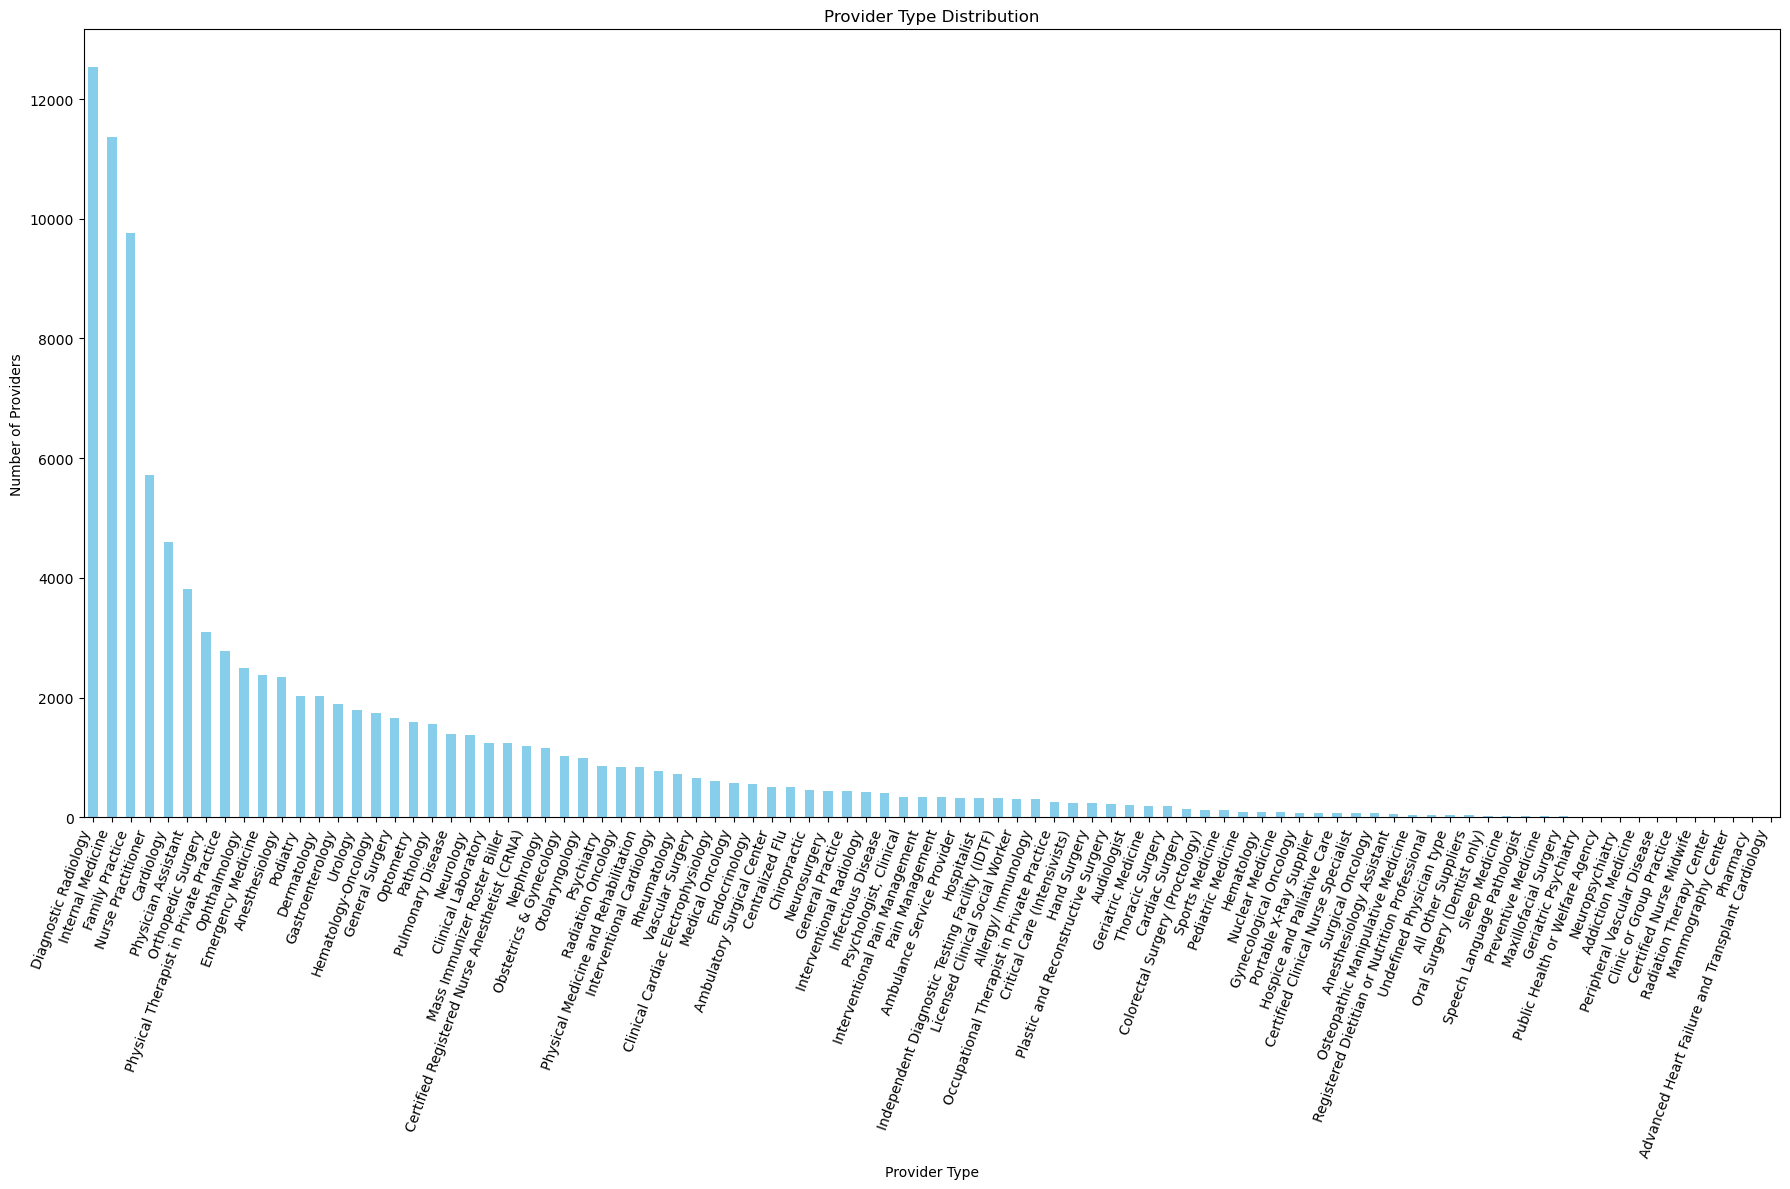

In [30]:
provider_counts.plot(kind='bar', color='skyblue', figsize=(18, 12))
plt.title('Provider Type Distribution')
plt.xlabel('Provider Type')
plt.ylabel('Number of Providers')
plt.xticks(rotation=70, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

# Gender Analysis

In [33]:
gender_counts = dataset['Gender of the Provider'].value_counts()
gender_counts

Gender of the Provider
M    66641
F    29105
Name: count, dtype: int64

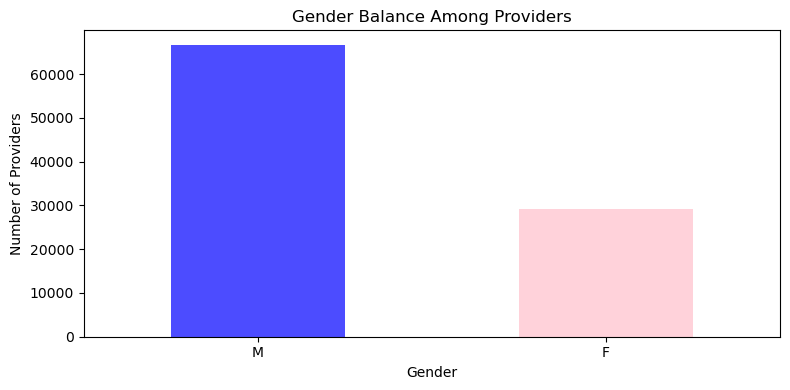

In [34]:
plt.figure(figsize=(8, 4))
gender_counts.plot(kind='bar', color=['blue', 'pink'], alpha=0.7)
plt.title('Gender Balance Among Providers')
plt.xlabel('Gender')
plt.ylabel('Number of Providers')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Geographic Insights

# State-wise Distribution

In [41]:
state_counts = dataset['State Code of the Provider'].value_counts()
state_metrics = dataset.groupby('State Code of the Provider')[
    ['Number of Services', 'Average Medicare Payment Amount']].mean()

TypeError: Could not convert 6012353518126036086816611911397344735180947227,34031870822384372059221413028582911265,300739157222679199120551234034133113331945502924951,576262716991312867315021521829054210128246701691945331534159215117025474314446112791821754455482618687415,9003890196761293431,72319129122783222311107444750423239172222984144183038632,7614142274231911531,078373681021754246318167724144802527481449211731801,29817023613643146730741135122481583641661161044321223142112,7051242715358631185803518117822154713246314817133133,800233444919941289477219513012131571342768475962113951391551359178131643619516141,35935764351418271155847666474527420348452629216633246972363192501615032133841797815431110217314534021281973220157620614124949222715888224365029411,48422256389121272,804203070155135636715231,1451775601,3894002831176845218682354924584954783167841142119247112687313131784222214420269816161391516166777142572716621441173213225628914421,34050572120983252411,170601170101194216902815101384814202881760152314947181729073171510,86050122721921571164846161134073345225266632132518441557111416164572857481411022693055632812119864740013151150542082362293693627762478516249431468432622921132211821263221421541,90220687013671324014153547183339763128624310752485,0248811169182442224312595175108105114942112263540256157238255255837923632252399985013751933013791,33024201828101135612112567114151513242722070161,38412114671052831,786169217251335113842893,29120151340311203612342763631111722341201,46013181505112762714196115183661,67939421220151,784294723353532972551364578329307767511117106242340359465613122613100181673349114137614,75031284425903018523795575952451,0262,4924923153315362026314342217691646210522130112671636151075314225736242428403584876941961731,271141292367924291368843111439214221613272,26011441899361120404252681,7844152020128528512484143111631105315199816201,387227101211712311162860132,4134065443220192113843326968132550108143457614377108191697552414527615111215141515162223653933772413125179351002,01619248,1272,43972178152115269582353434551,6804928662615058670228225522613212,160137735922174307461241048215411237142,0903212139946444862127466226221930532112117181579178497124515471045526552521201310218123364145248242114246452051137491555964292026342313153216163541335161523179592019337851812646722929111316474418,0001112310885507187523502138121541823524813826914729156511123589362823102124661094723113146188233588711530462361,5098752020193141312983501,047758481736922221918130632019771925182433281561687223685492512213253046228538272612019247111111630154614106121616507729179318303006542129252231214827924246211162636015521224224822772754113452016391576175121073054193520281915762309610112354861982871113512118199,6102715383115979712193172313492428313351281086058351592131410950965916151179133463316181611243204387603531614,4201632469133204931444141117984291950581913182542,317303323211534206643452193236957268131612145841359224860982621121893354128528711750125401176936822119149397251131151,60624425263116162541131134113215153,110147326164431331228,600398332192351082135914825641441244341626944,362819371815503194713742276363898328361361338172911552199122921882037183801233141011210627216119125114568160632626841681519917491187851,68035833049282716494528121172290419111726986481864939288876250441172337291215401827403419404938789952975601625146041681011,3171231135054471021822173214614220126352233111140361128912039157968701,679185612431138132223114111320655714961418614332163345501,0201696151371214151824794228531772122912235153734711282169109663543082141629220121263853102231361272011131414267013,144772472641114710121143216231565133454111811264776729191225236673683983811156042032032031216461916111518662302620310022129121116571112128236909998175152234151410810725220261862682118361420517914935502117731,099235113272442225118163241353914312840366145464467301443165571793381442467225626844203498988177693227281815226559917261333415191267818221270453160246324211120120443621,550412481133681354140541412673916123245516219298104570145081278214012183695737214723124192334925237098063721671671771322181617724131530252206311382425289311,560891232331665325391237572393321475570441,648161197025892304638111452125151481161432528721911959393123413155254279396713030526332581548315247113815156072117061923 to numeric